# 1. Đọc dữ liệu (1 điểm)

In [1]:
import pandas as pd

# Đọc dữ liệu
black_friday = pd.read_csv("black_friday.csv")

# Hiển thị 5 dòng đầu tiên
print(black_friday.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

# 2. Thông tin dữ liệu (1 điểm)

In [2]:
# Kiểm tra số dòng và số cột
print("Số dòng: ", black_friday.shape[0])
print("Số cột: ", black_friday.shape[1])

# Kiểm tra số lượng giá trị bị thiếu trong từng cột
print(black_friday.isnull().sum())

Số dòng:  550068
Số cột:  12
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


Nhận xét:
- Product_Category_2, Product_Category_3 thiếu rất nhiều 
- Các biến còn lại thì không có bị thiếu
- Thiếu những giá trị đó thì có thể fill vào là giá trị trung vị

# 3. Phân loại thuộc tính (1 điểm)


In [3]:
# Code
black_friday.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

- Các thuộc tính định tính (Categorical):
Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years     


- Các thuộc tính định lượng (Numerical):
User_ID, Occupation, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase                        


# 4. Sản phẩm phổ biến (1 điểm)

In [21]:
# Số lượng loại sản phẩm khác nhau
print(black_friday['Product_ID'].nunique())

# Sản phẩm được mua nhiều nhất
print("Sản phẩm được mua nhiều nhất")
print(black_friday.groupby('Product_ID')['Purchase'].sum().idxmax())
print(black_friday.groupby('Product_ID')['Purchase'].sum().max())

3631
Sản phẩm được mua nhiều nhất
P00025442
27995166


Nhận xét:

-
-


# 5. Tỷ lệ nam và nữ (1 điểm)

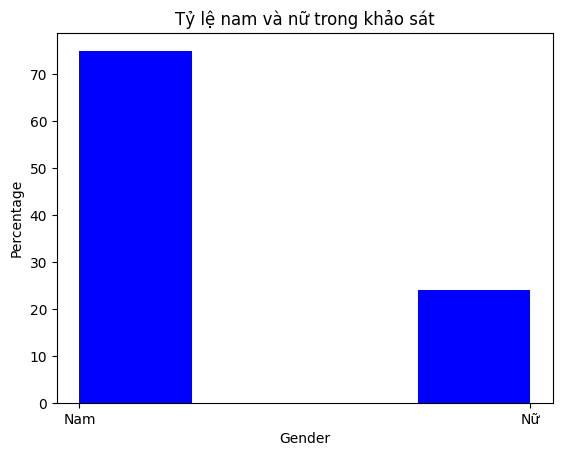

In [113]:
import matplotlib.pyplot as plt

# Số lượng nam và nữ
nam = black_friday[black_friday['Gender'] == 'M']['Gender'].count()
nu = black_friday[black_friday['Gender'] == 'F']['Gender'].count()

# Tính tỷ lệ phần trăm
total = nam + nu
ti_le_nam = (nam / total) * 100
ti_le_nu = (nu / total) * 100

# Tạo dữ liệu để vẽ histogram
data = [1.1] * int(ti_le_nam) + [1.8] * int(ti_le_nu)

# Vẽ histogram
plt.hist(data, bins=4, color=['blue'])

# Gán nhãn
plt.xticks([1.1, 1.8], ['Nam', 'Nữ'])
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Tỷ lệ nam và nữ trong khảo sát")

plt.show()


# 6. Nhóm tuổi có mức chi tiêu trung bình cao nhất (1 điểm)

In [38]:
# Tính mức chi tiêu trung bình theo nhóm tuổi
print(black_friday.groupby('Age')['Purchase'].mean())

# Hiển thị nhóm tuổi có mức chi tiêu cao nhất
print(black_friday.groupby('Age')['Purchase'].mean().idxmax())


Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64
51-55


# 7. Thống kê mức chi tiêu

In [39]:
# Tính các đại lượng thống kê
black_friday.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Nhận xét:
- Tỷ lệ tình trạng hôn nhân trung bình là 0.409653
- Nếu hôn nhân càng nhiều thì mua càng nhiều

# 8. Trực quan hóa phân bố chi tiêu

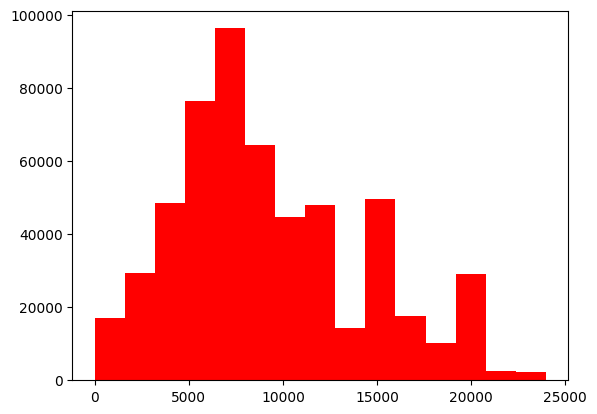

In [43]:
# Vẽ đồ thị Histogram hoặc Line hoặc hỗn hợp.

plt.hist(black_friday['Purchase'], color='red', bins=15)
plt.show()

Nhận xét:
- Tần suất mua nhiều nhất khi sấp xỉ 7000 
- thấp nhất là đi về cuối đồ thị

# 9. Biểu đồ hộp so sánh mức chi tiêu theo nhóm tuổi và giới tính (1 điểm)






Age
0-17       92527205
18-25     708372833
26-35    1588794345
36-45     783130921
46-50     304136539
51-55     277633647
55+       154984610
Name: Purchase, dtype: int64
Age
0-17      42385978
18-25    205475842
26-35    442976233
36-45    243438963
46-50    116706864
51-55     89465997
55+       45782765
Name: Purchase, dtype: int64


/var/folders/bj/4zbr51sj4fsbvtllcchl3wzc0000gn/T/ipykernel_818/3524089518.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([nam, nu], labels=['Nam', 'Nữ'])
/var/folders/bj/4zbr51sj4fsbvtllcchl3wzc0000gn/T/ipykernel_818/3524089518.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


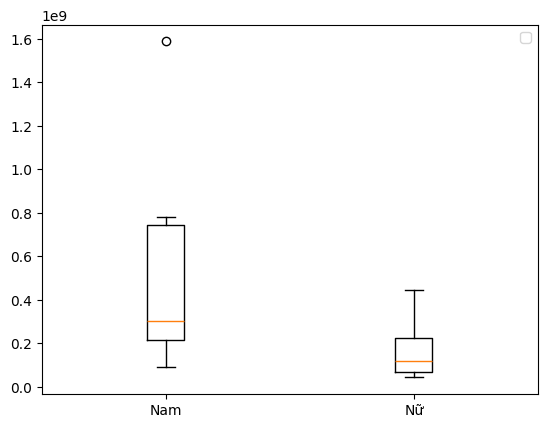

In [57]:
# Biểu đồ hộp (box-plot)
nam = black_friday[black_friday['Gender'] == 'M']
nam = nam.groupby('Age')['Purchase'].sum()
print(nam)

nu = black_friday[black_friday['Gender'] == 'F']
nu = nu.groupby('Age')['Purchase'].sum()
print(nu)

plt.boxplot([nam, nu], labels=['Nam', 'Nữ'])
plt.legend()
plt.show()


Nhận xét:
- Giá trị tại trung vị của nữ thấp hơn nhiều so với nam(nam càng cao tuổi càng nhiều)
- Bên giới tính nam có giá trị ngoại lai 

# 10. Biểu đồ tròn thể hiện tỷ lệ tổng chi tiêu của từng nhóm tuổi

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64


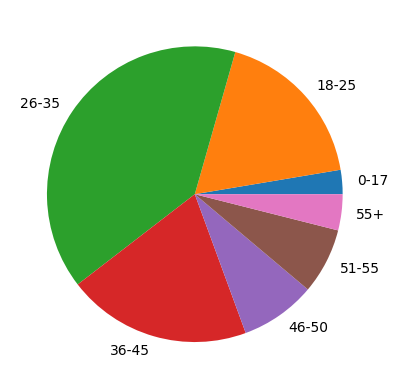

In [55]:
# Biểu đồ tròn
tong_chi_tieu = black_friday.groupby('Age')['Purchase'].sum()
print(tong_chi_tieu)
plt.pie(tong_chi_tieu, labels=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.show()



Nhận xét: 
- nhìn thấy độ tuổi 26-35 có tổng chi tiêu là cao nhất 
- thấp nhất là 0-17